In [1]:
from minde.libs.distribution_generator import EvolutionTask

In [2]:
task = EvolutionTask(1.0, dim_x=10, dim_y=10, mu=2000, population_size=10000, scale=1.0)
task.train(n_generations=300, temperature=0.5)
print(len(task.agents))
print(task.best_agent.fitness)
print(task.best_agent.distribution)

dist = task.best_agent.distribution
print(task.mutual_information(dist))

  0%|          | 0/300 [00:00<?, ?it/s]

Best fitness: -1.1047600056990348e-07: 100%|██████████| 300/300 [05:10<00:00,  1.03s/it]

10000
-inf
[[6.59904941e-03 1.08340173e-02 5.28408040e-04 1.66708315e-03
  3.03812457e-02 1.78171796e-03 4.94877217e-04 4.07145267e-04
  5.05125784e-02 1.00636283e-03]
 [2.09751435e-03 2.47602218e-03 4.32567090e-02 1.69321617e-02
  1.08998225e-03 4.02169196e-04 2.86407570e-04 2.73043239e-04
  7.27237410e-04 2.79168106e-02]
 [1.79653156e-05 4.43329470e-02 2.88276098e-04 7.94414683e-04
  4.67384672e-04 4.20839051e-04 2.91174677e-04 3.84284588e-02
  2.94457204e-02 6.91669830e-04]
 [1.23492472e-03 8.32814422e-04 8.81254036e-04 2.48172806e-02
  1.00939498e-04 2.46963161e-04 5.87931363e-02 2.49155383e-02
  4.98752838e-04 1.22515213e-03]
 [2.89194916e-02 1.20103374e-03 1.65425705e-03 2.90763790e-03
  9.31934235e-04 1.50547884e-04 2.14398837e-03 1.24547957e-03
  1.32891015e-04 3.89534900e-02]
 [7.20499194e-04 6.74233664e-05 4.75060784e-04 1.50068690e-04
  2.66525027e-02 3.87425787e-02 2.11088445e-03 1.63751739e-03
  3.47052749e-02 2.16814965e-03]
 [4.02351386e-07 4.13788277e-02 8.43722654e-04 

In [3]:
np.save(r"/home/foresti/minde/discrete_distributions/best_distribution_dim10_mutinfo01.npy", dist)

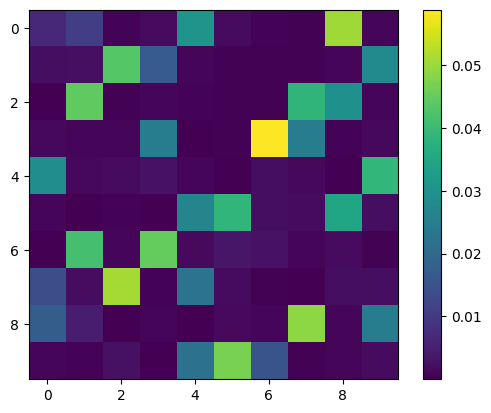

In [4]:
from matplotlib import pyplot as plt
plt.imshow(dist)
# put a scale on the side
plt.colorbar()